<a href="https://colab.research.google.com/github/MarkLee7925/Bank-Marketing-Classification/blob/main/BankMarketingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Classification

## 1. Import Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Load and Summarize Data

In [25]:
# Load dataframe (df)
df = pd.read_csv('bank-additional-full.csv', sep=';')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(41188, 20) (41188,)


In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 3. Visualize Data

#### Age Distribution

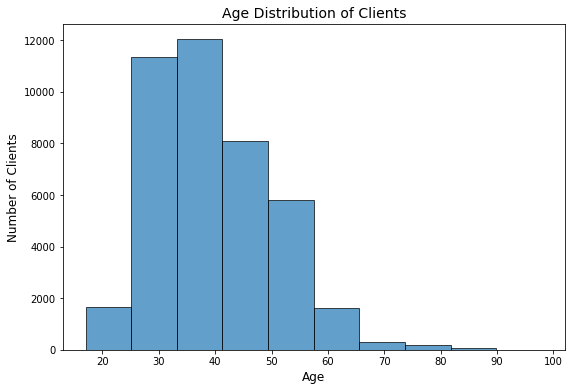

In [30]:
plt.figure(figsize=(9, 6))
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 14000, 2000))
age_dist = df['age']
plt.hist(x=age_dist, alpha=0.7, edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Age Distribution of Clients', fontsize=14)
plt.show()

#### Occupations of Clients

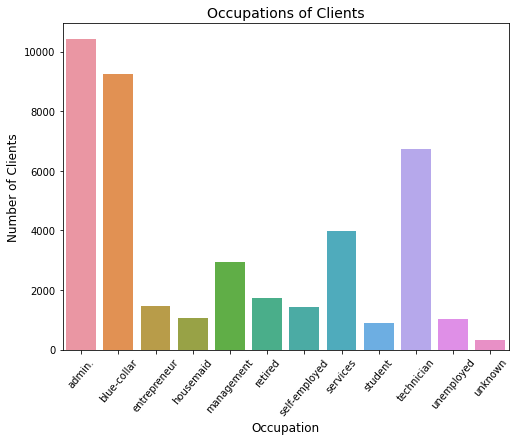

In [31]:
plt.figure(figsize=(8, 6))
job_order = ['admin.','blue-collar','entrepreneur','housemaid','management',
             'retired','self-employed','services','student','technician',
             'unemployed','unknown']
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 14000, 2000))
sns.countplot(x=df['job'], order=job_order)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Occupations of Clients', fontsize=14)
plt.show()

#### Education Levels

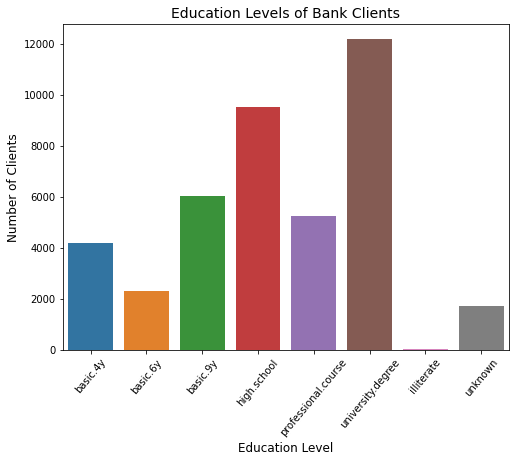

In [32]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 14000, 2000))
education_order = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
                   'professional.course', 'university.degree', 'illiterate',
                   'unknown']
gender_dist = df['education']
gender_plot = sns.countplot(x=df['education'], order=education_order)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Education Levels of Bank Clients', fontsize=14)
plt.show()

#### Marital Status

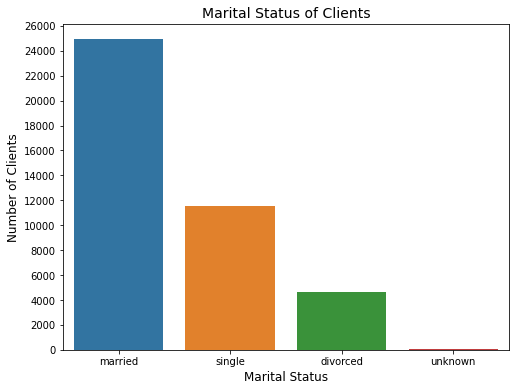

In [33]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 28000, 2000))
sns.countplot(x=df['marital'])
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Marital Status of Clients', fontsize=14)
plt.show()

#### Types of Loans

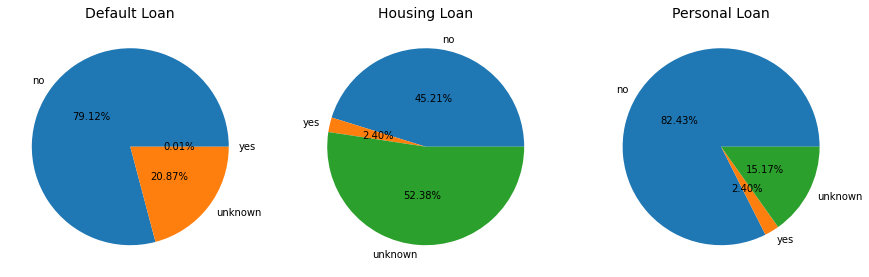

In [34]:
from collections import Counter

# Default Loan
loans = plt.figure(figsize=(15, 15))
ax1 = loans.add_subplot(1, 3, 1)
default_loan = Counter(df['default'])
ax1 = plt.pie(x=[default_loan['no'], default_loan['unknown'], default_loan['yes']], 
              labels=default_loan.keys(), 
              autopct="%.2f%%", pctdistance=0.5)
plt.title('Default Loan', fontsize=14)

# Housing Loan
ax2 = loans.add_subplot(1, 3, 2)
housing_loan = Counter(df['housing'])
ax2 = plt.pie(x=[housing_loan['no'], housing_loan['unknown'], housing_loan['yes']], 
              labels=housing_loan.keys(), 
              autopct="%.2f%%", pctdistance=0.5)
plt.title('Housing Loan', fontsize=14)

# Personal Loan
ax3 = loans.add_subplot(1, 3, 3)
personal_loan = Counter(df['loan'])
ax2 = plt.pie(x=[personal_loan['no'], personal_loan['unknown'], personal_loan['yes']], 
              labels=personal_loan.keys(), 
              autopct="%.2f%%", pctdistance=0.5)
plt.title('Personal Loan', fontsize=14)

plt.show()

In [35]:
print(default_loan)
print(housing_loan)
print(personal_loan)

Counter({'no': 32588, 'unknown': 8597, 'yes': 3})
Counter({'yes': 21576, 'no': 18622, 'unknown': 990})
Counter({'no': 33950, 'yes': 6248, 'unknown': 990})


#### Classication Results

###### Has the client subscribed a term deposit?

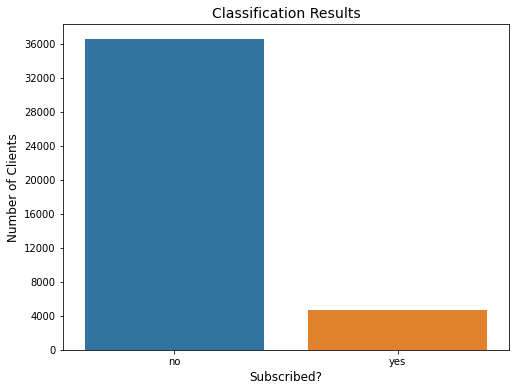

In [36]:
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 40000, 4000))
sns.countplot(x=df['y'])
plt.xlabel('Subscribed?', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Classification Results', fontsize=14)
plt.show()

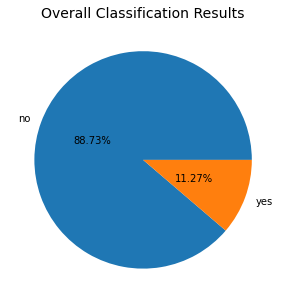

In [37]:
results_labels = ['no', 'yes']
plt.figure(figsize=(5, 5))
overall_results = Counter(df['y'])
plt.pie(x=[overall_results['no'], overall_results['yes']], 
        labels=results_labels, autopct="%.2f%%", pctdistance=0.5)
plt.title('Overall Classification Results', fontsize=14)
plt.show()

#### Correlation Map

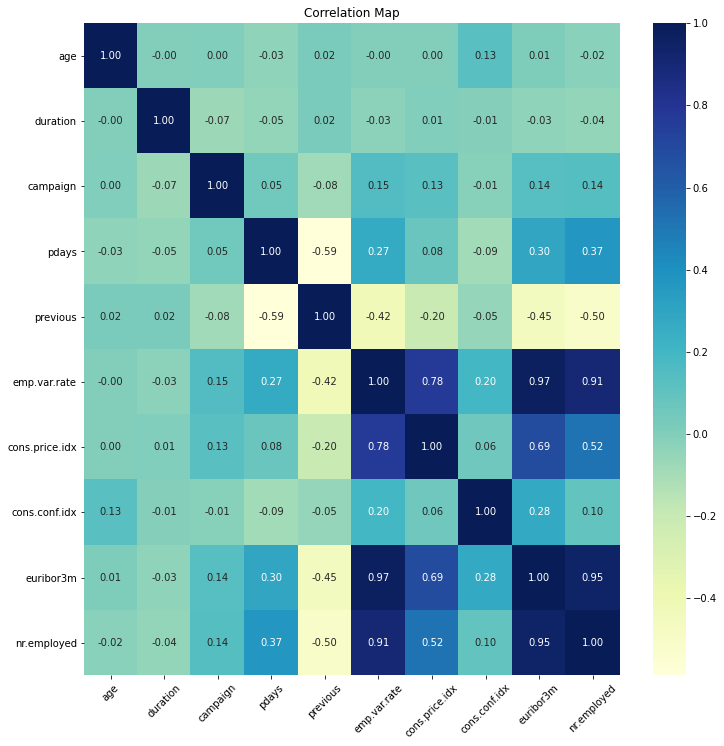

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [39]:
# Categorical Columns (indices) - [1:9]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le_columns = X[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]]

# for i in X[:]:
#   if i in le_columns:
#     X[:, i] = le.fit_transform(X[:, i])

X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 6] = le.fit_transform(X[:, 6])
X[:, 7] = le.fit_transform(X[:, 7])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 14] = le.fit_transform(X[:, 14])
y = le.fit_transform(y)

print(X[:, 1:14])
print(y)

[[3 1 0 ... 1 999 0]
 [7 1 3 ... 1 999 0]
 [7 1 3 ... 1 999 0]
 ...
 [5 1 6 ... 2 999 0]
 [9 1 5 ... 1 999 0]
 [5 1 5 ... 3 999 1]]
[0 0 0 ... 0 1 0]


In [40]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [41]:
# Feature Scale numerical columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_columns = [0, 10, 11, 12, 13, 15, 16, 17, 18, 19]
sc = StandardScaler()
X_train[:, numerical_columns] = sc.fit_transform(X_train[:, numerical_columns])
X_test[:, numerical_columns] = sc.transform(X_test[:, numerical_columns])

## 5. Define and Evalutate Models

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
# LightGBM
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Additional Libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

### Logistic Regression (LR)

In [43]:
# Accuracy Scoring
lr_model = LogisticRegression(C=0.08, class_weight='dict', penalty='l2', 
                         random_state=0)

# ROC_AUC Scoring
# lr_model = LogisticRegression(C=1.1, class_weight='balanced', penalty='l2', 
#                          random_state=0)

# Train LR model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.08, class_weight='dict', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Predict test set results
# If y_pred > 0.5, client has subscribed to a term deposit
y_pred = lr_model.predict(X_test)
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
# print("ROC_AUC: %.3f%% " % (roc_auc_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

y_pred: y_test:
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[7126  193]
 [ 500  419]]

Test Accuracy: 91.588% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.68      0.46      0.55       919

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [45]:
# Apply k-Fold Cross Validation on the training set
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(lr_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# scores = cross_val_score(lr_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Force scores to be positive
scores = abs(scores)
print("Mean Accuracy: %.3f%%" % (np.mean(scores) * 100))
print("Standard Deviation: %.3f%%" % np.std(scores))
print("Min Accuracy: %.3f%%" % (np.min(scores) * 100))
print("Max Accuracy: %.3f%%" % (np.max(scores) * 100))

Mean Accuracy: 90.945%
Standard Deviation: 0.004%
Min Accuracy: 90.015%
Max Accuracy: 91.654%


<table border = "1">
  <thead>
    <th colspan = "3">Logistic Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>90.945%</td>
      <td>93.110%</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.004%</td>
      <td>0.005%</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.015%</td>
      <td>92.168%</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>91.654%</td>
      <td>93.967%</td>
    </tr>
  </tbody>
</table>

In [48]:
# Apply Grid Search for parameter tuning

# param_dict = {'C': [0.1, 0.2, 0.25, 0.4, 0.5, 0.75, 0.9, 1],
#               'penalty': ['l1', 'l2'],
#               'class_weight': ['dict', 'balanced'],
#               'random_state': [0, 1]}

# Accuracy scoring
param_dict = {'C': [0.08],
              'penalty': ['l2'],
              'class_weight': ['dict'],
              'random_state': [0, 1]}

# ROC_AUC scoring
# param_dict = {'C': [1.09, 1.1, 1.11],
#               'penalty': ['l2'],
#               'class_weight': ['balanced'],
#               'random_state': [0, 1]}

grid = GridSearchCV(lr_model, param_dict, scoring='accuracy', cv=cv, n_jobs=-1)
# grid = GridSearchCV(lr_model, param_dict, scoring='roc_auc', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 90.945%
Best Parameters:  {'C': 0.08, 'class_weight': 'dict', 'penalty': 'l2', 'random_state': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<table border = "1">
  <thead>
    <th colspan = "3">Logistic Regression Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>90.945%</td>
      <td>93.110%</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.08</td>
      <td>1.1</td>
    </tr>
    <tr>
      <td><b>class_weight</b></td>
      <td>'dict'</td>
      <td>'balanced'</td>
    </tr>
    <tr>
      <td><b>penalty</b></td>
      <td>'l2'</td>
      <td>'l2'</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>


### Decision Tree (DT)

In [49]:
# Accuracy Scoring
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                             min_samples_leaf=3, min_samples_split=2, 
                             random_state=4)

# ROC_AUC Scoring
# dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                              min_samples_leaf=18, min_samples_split=2, 
#                              random_state=0)

# Train DT Model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [50]:
# Predict test set results
# If y_pred > 0.5, client has subscribed to a term deposit
y_pred = dt_model.predict(X_test)
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
# print("ROC_AUC: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

y_pred: y_test:
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[7095  224]
 [ 443  476]]

Test Accuracy: 91.903% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7319
           1       0.68      0.52      0.59       919

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [51]:
# Apply k-Fold Cross Validation on the training set
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(dt_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# scores = cross_val_score(dt_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Force scores to be positive
scores = abs(scores)
print("Mean Accuracy: %.3f%%" % (np.mean(scores) * 100))
print("Standard Deviation: %.3f%%" % np.std(scores))
print("Min Accuracy: %.3f%%" % (np.min(scores) * 100))
print("Max Accuracy: %.3f%%" % (np.max(scores) * 100))

Mean Accuracy: 91.392%
Standard Deviation: 0.004%
Min Accuracy: 90.501%
Max Accuracy: 92.170%


<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.392%</td>
      <td>93.575%</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.004%</td>
      <td>0.006%</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.501%</td>
      <td>91.603%</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.170%</td>
      <td>94.683%</td>
    </tr>
  </tbody>
</table>

In [52]:
# Apply Grid Search for parameter tuning

# param_dict = {'criterion': ['gini', 'entropy'],
#               'max_depth': [5, 10, 25, 50],
#               'min_samples_leaf': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'random_state': [0, 1, 2]}

# Accuracy scoring
param_dict = {'criterion': ['entropy'],
              'max_depth': [6],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [2, 3],
              'random_state': [2, 3, 4]}

# ROC_AUC scoring
# param_dict = {'criterion': ['entropy'],
#               'max_depth': [6],
#               'min_samples_leaf': [17, 18, 19],
#               'min_samples_split': [1, 2, 3],
#               'random_state': [0, 1]}

grid = GridSearchCV(dt_model, param_dict, scoring='accuracy', cv=cv, n_jobs=-1)
# grid = GridSearchCV(dt_model, param_dict, scoring='roc_auc', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 91.392%
Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 3}


<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>91.392%</td>
      <td>93.575%</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'entropy'</td>
      <td>'entropy'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>6</td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>3</td>
      <td>18</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>3</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Random Forest (RF)

In [53]:
# Accuracy Scoring
rf_model = RandomForestClassifier(criterion='gini', max_depth=60, n_estimators=270,
                             min_samples_leaf=6, min_samples_split=9, 
                             max_samples=0.8, random_state=2)

# ROC_AUC Scoring
# rf_model = RandomForestClassifier(criterion='entropy', max_depth=13, 
#                              n_estimators=149, min_samples_leaf=6, 
#                              min_samples_split=3, max_samples=0.8, 
#                              random_state=0)

# Train RF model
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=270,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [54]:
# Predict test set results
# If y_pred > 0.5, client has subscribed to a term deposit
y_pred = rf_model.predict(X_test)
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
# print("ROC_AUC: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

y_pred: y_test:
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[7092  227]
 [ 442  477]]

Test Accuracy: 91.879% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.68      0.52      0.59       919

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [56]:
# Apply k-Fold Cross Validation on the training set
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(rf_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# scores = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Force scores to be positive
scores = abs(scores)
print("Mean Accuracy: %.3f%%" % (np.mean(scores) * 100))
print("Standard Deviation: %.3f%%" % np.std(scores))
print("Min Accuracy: %.3f%%" % (np.min(scores) * 100))
print("Max Accuracy: %.3f%%" % (np.max(scores) * 100))

Mean Accuracy: 91.569%
Standard Deviation: 0.004%
Min Accuracy: 90.683%
Max Accuracy: 92.443%


<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.569%</td>
      <td>94.780%</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.004%</td>
      <td>0.004%</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.683%</td>
      <td>93.835%</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.443%</td>
      <td>05.552%</td>
    </tr>
  </tbody>
</table>

In [57]:
# Apply Grid Search for parameter tuning

# param_dict = {'n_estimators': [50, 100, 150, 200, 250],
#               'criterion': ['gini', 'entropy'],
#               'max_depth': [10, 25, 50, 75, 100],
#               'min_samples_leaf': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
#               'random_state': [0, 1, 2]}

# Accuracy scoring
param_dict = {'criterion': ['gini'],
              'max_depth': [60],
              'n_estimators': [270],
              'min_samples_leaf': [6],
              'min_samples_split': [9],
              'max_samples': [0.8],
              'random_state': [2]}

# ROC_AUC scoring
# param_dict = {'criterion': ['entropy'],
#               'max_depth': [13],
#               'n_estimators': [149],
#               'min_samples_leaf': [6],
#               'min_samples_split': [3],
#               'max_samples': [0.8],
#               'random_state': [0]}

grid = GridSearchCV(rf_model, param_dict, scoring='accuracy', cv=cv, n_jobs=-1)
# grid = GridSearchCV(rf_model, param_dict, scoring='roc_auc', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 91.569%
Best Parameters:  {'criterion': 'gini', 'max_depth': 60, 'max_samples': 0.8, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 270, 'random_state': 2}


<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>91.569%</td>
      <td>94.780%</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'gini'</td>
      <td>'entropy'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>60</td>
      <td>13</td>
    </tr>
    <tr>
      <td><b>max_samples</b></td>
      <td>0.8</td>
      <td>0.8</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>6</td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>9</td>
      <td>3</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>270</td>
      <td>149</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>2</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [58]:
# Accuracy Scoring
xgb_model = XGBClassifier(max_depth=6, n_estimators=99, learning_rate=0.1, 
                    colsample_bytree=0.5, gamma=0, min_child_weight=1, 
                    reg_alpha=0.1, subsample=1, random_state=0)

# ROC_AUC Scoring
# xgb_model = XGBClassifier(max_depth=6, n_estimators=104, learning_rate=0.09, 
#                     gamma=0.02, colsample_bytree=0.7, min_child_weight=5,
#                     reg_alpha=1.2, subsample=1, random_state=7)

# Train XGB Model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=99, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
# Predict test set results
# If y_pred > 0.5, client has subscribed to a term deposit
y_pred = xgb_model.predict(X_test)
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
# print("ROC_AUC: %.3f%% " % (roc_auc_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

y_pred: y_test:
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[7081  238]
 [ 401  518]]

Test Accuracy: 92.243% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7319
           1       0.69      0.56      0.62       919

    accuracy                           0.92      8238
   macro avg       0.82      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238



In [60]:
# Apply k-Fold Cross Validation on the training set
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(xgb_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# scores = cross_val_score(xgb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Force scores to be positive
scores = abs(scores)
print("Mean Accuracy: %.3f%%" % (np.mean(scores) * 100))
print("Standard Deviation: %.3f%%" % np.std(scores))
print("Min Accuracy: %.3f%%" % (np.min(scores) * 100))
print("Max Accuracy: %.3f%%" % (np.max(scores) * 100))

Mean Accuracy: 91.689%
Standard Deviation: 0.004%
Min Accuracy: 90.986%
Max Accuracy: 92.504%


<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.689%</td>
      <td>94.950%</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.004%</td>
      <td>0.004%</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.986%</td>
      <td>94.132%</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.504%</td>
      <td>95.564%</td>
    </tr>
  </tbody>
</table>

In [61]:
# Apply Grid Search for parameter tuning

# param_dict = {'max_depth': [1, 2, 5, 10, 20], 
#               'n_estimators': [50, 100, 150, 200],
#               'learning_rate': [0.05, 0.1, 0.15],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'gamma': [0, 0.05],
#               'min_child_weight': [2, 5, 8, 10],
#               'reg_alpha':[0.001, 0.01, 0.1, 1, 10],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0, 1, 5, 10, 20, 40]}

# Accuracy scoring
param_dict = {'max_depth': [6],
              'n_estimators': [99],
              'learning_rate': [0.1],
              'colsample_bytree': [0.5],
              'gamma': [0],
              'min_child_weight': [1],
              'reg_alpha':[0.1],
              'subsample': [1.0],
              'random_state': [0, 1]}

# ROC_AUC scoring
# param_dict = {'max_depth': [6],
#               'n_estimators': [104],
#               'learning_rate': [0.09],
#               'colsample_bytree': [0.7],
#               'gamma': [0.02],
#               'min_child_weight': [5],
#               'reg_alpha':[1.2],
#               'subsample': [1],
#               'random_state': [6, 7]}

grid = GridSearchCV(xgb_model, param_dict, scoring='accuracy', cv=cv, n_jobs=-1)
# grid = GridSearchCV(xgb_model, param_dict, scoring='roc_auc', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
print("Best Parameters: ", best_parameters)


Best Accuracy: 91.689%
Best Parameters:  {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 99, 'random_state': 0, 'reg_alpha': 0.1, 'subsample': 1.0}


<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>91.689%</td>
      <td>94.950%</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>6</td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>99</td>
      <td>104</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1</td>
      <td>0.09</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.5</td>
      <td>0.7</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0</td>
      <td>0.02</td>
    </tr>
    <tr>
      <td><b>min_child_weight</b></td>
      <td>1</td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>0.1</td>
      <td>1.2</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
      <td>7</td>
    </tr>
  </tbody>
</table>

### LightGBM (LGB)

In [62]:
# Accuracy Scoring 
lgb_model = LGBMClassifier(boosting_type='gbdt', max_depth=12, n_estimators=50, 
                     learning_rate=0.1, colsample_bytree=1, num_leaves=22, 
                     min_split_gain=2, max_samples=0.01, reg_alpha=1.22, 
                     reg_lambda=1.48, subsample=1, subsample_freq=1, 
                     random_state=0)

# ROC_AUC Scoring 
# lgb_model = LGBMClassifier(boosting_type='gbdt', max_depth=18, n_estimators=55, 
#                      learning_rate=0.07, colsample_bytree=0.95, num_leaves=38, 
#                      min_split_gain=2, max_samples=0.01, reg_alpha=0.32, 
#                      reg_lambda=0.18, subsample=0.99, subsample_freq=1, 
#                      random_state=0)

# Train LGB Model
lgb_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.1, max_depth=12,
               max_samples=0.01, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=2, n_estimators=50, n_jobs=-1, num_leaves=22,
               objective=None, random_state=0, reg_alpha=1.22, reg_lambda=1.48,
               silent=True, subsample=1, subsample_for_bin=200000,
               subsample_freq=1)

In [63]:
# Predict test set results
# If y_pred > 0.5, client has subscribed to a term deposit
y_pred = lgb_model.predict(X_test)
y_pred = (y_pred > 0.5)
print('y_pred: y_test:')
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Create the confusion matrix
# TN = cm[0][0]  # True Negative
# FP = cm[0][1]  # False Positive
# FN = cm[1][0]  # False Negative
# TP = cm[1][1]  # True Positive
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('')
print("Test Accuracy: %.3f%% " % (accuracy_score(y_test, y_pred) * 100))
# print("ROC_AUC: %.3f%% " % (roc_auc_score(y_test, y_pred) * 100))
print('')

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of occurrences of each class in y_pred
print('Classification Report: ')
print(classification_report(y_test, y_pred))

y_pred: y_test:
[[0 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]

Confusion Matrix: 
[[7060  259]
 [ 389  530]]

Test Accuracy: 92.134% 

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7319
           1       0.67      0.58      0.62       919

    accuracy                           0.92      8238
   macro avg       0.81      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238



In [64]:
# Apply k-Fold Cross Validation on the training set
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(lgb_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# scores = cross_val_score(lgb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# Force scores to be positive
scores = abs(scores)
print("Mean Accuracy: %.3f%%" % (np.mean(scores) * 100))
print("Standard Deviation: %.3f%%" % np.std(scores))
print("Min Accuracy: %.3f%%" % (np.min(scores) * 100))
print("Max Accuracy: %.3f%%" % (np.max(scores) * 100))

Mean Accuracy: 91.763%
Standard Deviation: 0.004%
Min Accuracy: 90.986%
Max Accuracy: 92.473%


<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.763%</td>
      <td>95.021%</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.004%</td>
      <td>0.004%</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.986%</td>
      <td>94.323%</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.473%</td>
      <td>95.756%</td>
    </tr>
  </tbody>
</table>

In [65]:
# Apply Grid Search for parameter tuning

# param_dict = {'boosting_type': ['gbdt'],
#               'max_depth': [10, 25, 50, 75, 100],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 10, 20, 40]}

# Accuracy scoring
param_dict = {'boosting_type': ['gbdt'],
              'max_depth': [12],
              'n_estimators': [50],
              'learning_rate': [0.1],
              'colsample_bytree': [1],
              'num_leaves': [22],
              'min_split_gain': [2],
              'max_samples': [0.01],
              'reg_alpha': [1.22],
              'reg_lambda': [1.48],
              'subsample': [1],
              'subsample_freq': [1],
              'random_state': [0, 1]}

# ROC_AUC scoring
# param_dict = {'boosting_type': ['gbdt'],
#               'max_depth': [18],
#               'n_estimators': [55],
#               'learning_rate': [0.07],
#               'colsample_bytree': [0.95],
#               'num_leaves': [38],
#               'min_split_gain': [2],
#               'max_samples': [0.01],
#               'reg_alpha': [0.32],
#               'reg_lambda': [0.18],
#               'subsample': [0.99],
#               'subsample_freq': [1],
#               'random_state': [0, 1]}


grid = GridSearchCV(lgb_model, param_dict, scoring='accuracy', cv=cv, n_jobs=-1)
# grid = GridSearchCV(lgb_model, param_dict, scoring='roc_auc', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 91.763%
Best Parameters:  {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 12, 'max_samples': 0.01, 'min_split_gain': 2, 'n_estimators': 50, 'num_leaves': 22, 'random_state': 0, 'reg_alpha': 1.22, 'reg_lambda': 1.48, 'subsample': 1, 'subsample_freq': 1}


<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy</b></td>
      <td><b>ROC_AUC</b></td>
    </tr>
    <tr>
      <td><b>Best Score</b></td>
      <td>91.763%</td>
      <td>95.021%</td>
    </tr>
    <tr>
      <td colspan="3"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>12</td>
      <td>18</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>50</td>
      <td>55</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1</td>
      <td>0.07</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>1</td>
      <td>0.95</td>
    </tr>
    <tr>
      <td><b>num_leaves</b></td>
      <td>22</td>
      <td>38</td>
    </tr>
    <tr>
      <td><b>min_split_gain</b></td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>max_samples</b></td>
      <td>0.01</td>
      <td>0.01</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>1.22</td>
      <td>0.32</td>
    </tr>
    <tr>
      <td><b>reg_lambda</b></td>
      <td>1.48</td>
      <td>0.18</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
      <td>0.99</td>
    </tr>
    <tr>
      <td><b>subsample_freq</b></td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "3">Classification Scores Per Model</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td><b>Accuracy (%)</b></td>
      <td><b>ROC_AUC (%)</b></td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>91.392</td>
      <td>93.575</td>
    </tr>
    <tr>
      <td><b>LightGBM (LGB)</b></td>
      <td>91.763</td>
      <td>95.021</td>
    </tr>
    <tr>
      <td><b>Logistic Regression (LR)</b></td>
      <td>90.945</td>
      <td>93.110</td>
    </tr>
    <tr>
      <td><b>Random Forest (RF)</b></td>
      <td>91.569</td>
      <td>94.780</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>91.689</td>
      <td>94.950</td>
    </tr>
  </tbody>
</table>